<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [249]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [250]:
# Answer:
movies.shape


(979, 6)

#### Check the data type of each column.

In [251]:
# Answer:
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [252]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [253]:
# Answer:df.sort_values(by=['col1'])
short_movies = movies.sort_values(by='duration')
long_movies = movies.sort_values(by='duration', ascending=False)

long_movies.iloc[:10]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [254]:

    
short_movies.iloc[:10]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5,0,'Movie Duration')

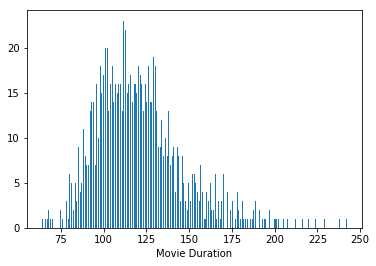

In [255]:
# Answer:
plt.hist(movies['duration'], bins=300)
plt.xlabel("Movie Duration")

#### Use a box plot to display that same data.

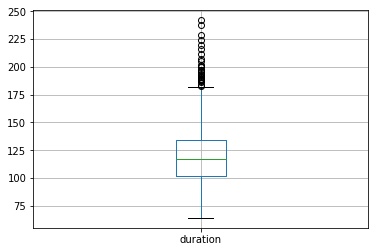

In [256]:
# Answer:postings.boxplot(column='price', by='location')
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [257]:
# Answer:sur_perimetre[col].value_counts()
rating_count = movies['content_rating'].value_counts()
rating_count

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Movies')

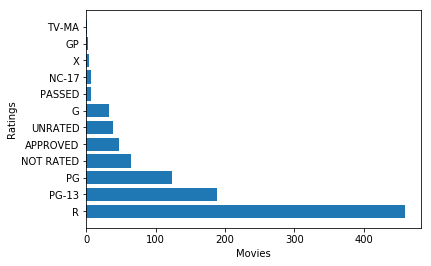

In [258]:
# Answer:


x_axis = ['R', 'PG-13', 'PG', 'NOT RATED', 'APPROVED', 'UNRATED', 'G', 'PASSED', 'NC-17', 'X', 'GP', 'TV-MA'] 
y_axis = [460, 189, 123, 65, 47, 38, 32, 7, 7, 4, 3, 1 ]

#ind =np.arange(len(x_axis))

plt.barh(x_axis, y_axis)
plt.ylabel("Ratings")
plt.xlabel("Movies")

Text(0,0.5,'Count')

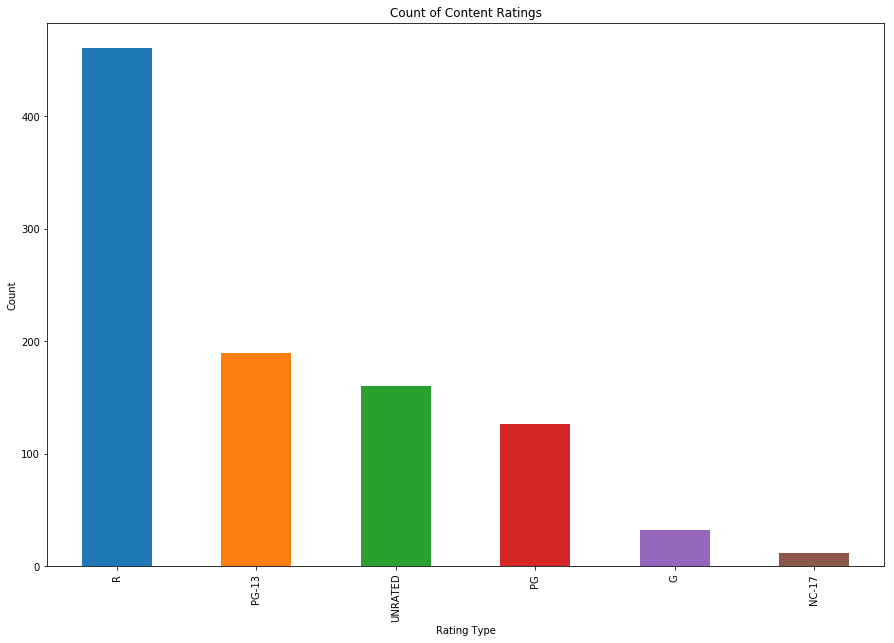

In [117]:
df = movies['content_rating'].value_counts()
df
ax = df.plot(kind='bar', figsize=(15,10), title ='Count of Content Ratings')
ax.set_xlabel('Rating Type')
ax.set_ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [275]:
# Answer:df['User_id'] = df['User_id'].replace(0, 'is not empty')
movies['content_rating'] = movies['content_rating'].replace('NOT RATED', 'UNRATED')
movies['content_rating'] = movies['content_rating'].replace('APPROVED', 'UNRATED')
movies['content_rating'] = movies['content_rating'].replace('PASSED', 'UNRATED')
movies['content_rating'] = movies['content_rating'].replace('GP', 'UNRATED')
rating_count = movies['content_rating'].value_counts()
rating_count

R          460
PG-13      189
UNRATED    160
PG         126
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [276]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace('X', 'NC-17')
movies['content_rating'] = movies['content_rating'].replace('TV-MA', 'NC-17')
rating_count = movies['content_rating'].value_counts()
rating_count

R          460
PG-13      189
UNRATED    160
PG         126
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [260]:
# Answer:df.isnull().sum(axis=1)
for col in movies:
    miss_val = movies.isnull().sum()
miss_val
    

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [261]:
# Answer:null_data = df[df.isnull().any(axis=1)]

null_row = movies[movies.isnull().any(axis=1)]
null_row

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [262]:
movies = movies.fillna('PG')
for col in movies:
    miss_val = movies.isnull().sum()
miss_val

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [264]:
rating_count = movies['content_rating'].value_counts()
rating_count

R            460
PG-13        189
PG           126
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [ ]:
# Answer:


In [267]:
print(movies[movies.duration >= 120].star_rating.mean())
print(movies[movies.duration < 120].star_rating.mean())
    
        #ave_ratings.append(movies.star_rating)
    
    

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

Text(0,0.5,'Star Rating')

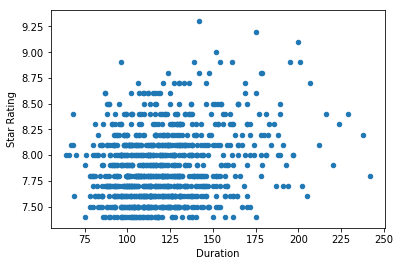

In [268]:
# Answer:

#x = movies.duration
#y = movies.star_rating
#plt.scatter(x, y)


movies.plot(kind='scatter', x='duration', y='star_rating')
plt.xlabel('Duration')
plt.ylabel('Star Rating')

#### Calculate the average duration for each genre.

In [269]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A97D7C6BE0>,
      dtype=object)

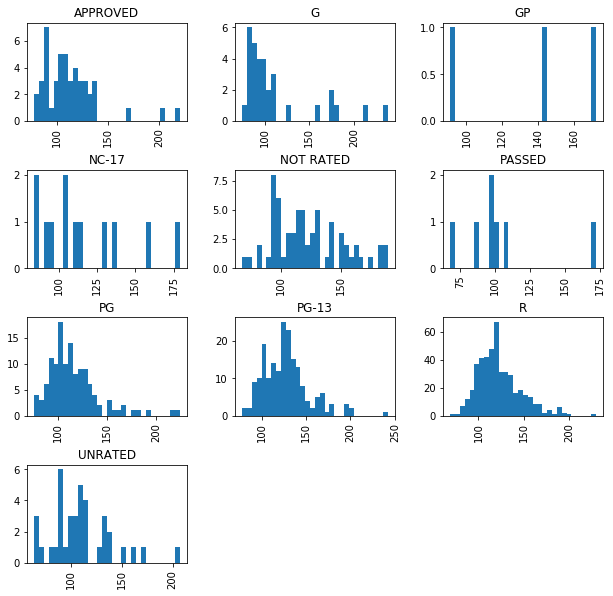

In [270]:
# Answer:
movies.hist(column = "duration",by= 'content_rating', bins=30 , figsize=(10,10))

#### Determine the top rated movie (by star rating) for each genre.

In [271]:
# Answer:
movies.sort_values('star_rating', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [277]:
# Answer:
dup_entries = movies[movies.title.duplicated()].title
movies[movies.title.isin(dup_entries)]


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [289]:
# Answer:
movies.genre.value_counts()
ave_star_rating = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery' ]
movies[movies.genre.isin(ave_star_rating)].groupby("genre").star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [301]:
# Answer:
genre_count = movies.genre.value_counts(0)
top10_genres = genre_count[genre_count >= 10].index
movies[movies.genre.isin(top10_genres)].groupby("genre").star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [316]:
# Answe
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [320]:
# Answer:
genre_agg = movies.groupby('genre').star_rating.agg(['count','mean'])
genre_agg[genre_agg['count']>=10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### Figure out something "interesting" using the actors data!